# Introduction

This is a sample of some pandas code I wrote for the project. For the full analysis and conclusions, please see [Report - Hospital Compare](./Report - Hospital Compare.pdf)

---

# Hospital Compare - Value of Care vs. Patient Experience

"Hospital Compare is a consumer-oriented website that provides information on the quality of care hospitals are providing to their patients. This information can help consumers make informed decisions about health care."

Data was downloaded from Medicare (https://data.medicare.gov/data/hospital-compare) on Jul 30, 2019. The dataset was last updated as of Jul 30, 2019.


## Linking Quality to Payment: Hospital Value-Based Purchasing (HVBP) Program

### Description & Background
According to the "DDB Data Dictionary_July 2019", which came with the datset from the Centers for Medicare & Medicaid Services, the HVBP program is a "long-standing effort to link Medicare’s payment system to quality."

Through the HVBP program, CMS pays hospitals based on the quality of care, measured on four domains. Details: https://www.cms.gov/Outreach-and-Education/Medicare-Learning-Network-MLN/MLNProducts/downloads/Hospital_VBPurchasing_Fact_Sheet_ICN907664.pdf

### For 2019, here are the criteria.

#### 1. Clinical care

|Measure ID|Measure Description|
|---|---|
|MORT-30-AMI|Acute Myocardial Infarction (AMI) 30-Day Mortality Rate|
|MORT-30-HF |Heart Failure (HF) 30-Day Mortality Rate|
|MORT-30-PN|Pneumonia (PN) 30-Day Mortality Rate|
|THA/TKA|Total Hip Arthroplasty (THA) and/or Total Knee Arthroplasty (TKA)|

#### 2. Person and Community Engagement

        Measure ID: HCAHPS Survey
        Measure Description:
        * Communication with Nurses  
        * Communication with Doctors
        * Responsiveness of Hospital Staff
        * Communication about Medicines
        * Hospital Cleanliness and Quietness
        * Discharge Information
        * 3-Item Care Transition
        * Overall Rating of Hospital|


#### 3. Safety

|Measure ID|Measure Description|
|---|---|
|CAUTI|Catheter-Associated Urinary Tract Infection|
|CLABSI|Central Line-Associated Blood Stream Infection|
|CDI|_Clostridium difficile_ Infection (_C. difficile_)|
|MRSA|Methicillin-Resistant _Staphylococcus aureus_ Bacteremia|
|PC-01|Elective Delivery Prior to 39 Completed Weeks Gestation|
|SSI|Surgical Site Infection: Colon; Abdominal Hysterectomy|

#### 4. Efficiency and Cost reduction. 

|Measure ID|Measure Description|
|---|---|
|MSPB|Medicare Spending per Beneficiary (MSPB) |

The domains consist of measures for Safety, Patient Experience of Care, Clinical Care Outcomes, Perinatal Outcomes, and Efficiency and the measures add up to the Total Performance Score (TPS). 



According to cms.gov:
>CMS rewards hospitals based on:  
● The quality of care provided to Medicare patients  
● How closely best clinical practices are followed  
● How well hospitals enhance patients’ experiences of care during hospital stays  
Hospitals are no longer paid solely on the quantity of services provided. Under the Hospital VBP
Program, Medicare makes incentive payments to hospitals based on either:  
● How well they perform on each measure compared to other hospitals’ performance during a
baseline period  
● How much they improve their performance on each measure compared to their performance during
a baseline period  
The performance information is reported through QualityNet, the secure extranet portal supporting
Center for Clinical Standards and Quality (CCSQ) quality reporting programs for health care providers
and vendors supporting providers.


Some examples of such measures include frequency of healthcare associated infections (HAI), excess readmission rates, emergency room wait times, and patient satisfaction surveys. 



In [1]:
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline 


## Payment and Value of Care

### Description and Background
"Payment and Value of Care" dataset contains "Hospital-level results for payment measures and value of care displays associated with 30-day mortality measures". 

This dataset essentially merges both payment measures (MSPB-1) and quality measures (mortality). In the data dump from the CMS, there are other datasets containing more detailed info about MSPB-1. However, we'll use this dataset, which already analyzes which hospitals and compares them to the national average.

Here is the exact description about "Payment and Value of Care Measures" from the DDB Data Dictionary July 2019:

> The Medicare Spending Per Beneficiary (MSPB-1) Measure assesses Medicare Part A and Part B payments for services provided to a Medicare beneficiary during a spending-per-beneficiary episode that spans from three days prior to an inpatient hospital admission through 30 days after discharge. The payments included in this measure are price-standardized and risk-adjusted.  
The payment measures for heart attack, heart failure, pneumonia, and hip/knee replacement include the payments made for Medicare beneficiaries who are 65 years and older. The measures add up payments made for care and supplies starting the day the patient enters the hospital and for the next 30 days or 90 days for hip/knee replacement. The measures are meant to reflect differences in the services and supplies provided to patients.  
Hospital results are provided in the downloadable databases for the heart attack, heart failure, pneumonia, and hip/knee replacement payment measures. You can see whether the payments made for patients treated at a particular hospital is less than, no different than, or greater than the national average payment. For some hospitals, the number of cases is too small to reliably compare their results to the national average payment.


In [2]:
pmt = pd.read_csv('/Users/haeranglee/Documents/MIDS/Hospital_Revised_Flatfiles_recent/PAYMENT AND VALUE OF CARE - HOSPITAL.CSV')


In [3]:
pmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19032 entries, 0 to 19031
Data columns (total 22 columns):
Provider ID                   19032 non-null int64
Hospital name                 19032 non-null object
Address                       19032 non-null object
City                          19032 non-null object
State                         19032 non-null object
ZIP Code                      19032 non-null int64
County name                   19032 non-null object
Phone number                  19032 non-null int64
Payment measure name          19032 non-null object
Payment measure ID            19032 non-null object
Payment category              19032 non-null object
Denominator                   19032 non-null object
Payment                       19032 non-null object
Lower estimate                19032 non-null object
Higher estimate               19032 non-null object
Payment footnote              6661 non-null object
Value of care display name    19032 non-null object
Value of ca

In [4]:
pmt.head(5)

,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,Payment measure ID,...,Payment,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure end date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Payment for heart attack patients,PAYM_30_AMI,...,"$24,216","$22,939","$25,579",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average Mortality and Average Payment,NaN,07/01/2015,06/30/2018
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Payment for heart failure patients,PAYM_30_HF,...,"$17,716","$16,905","$18,523",NaN,Value of Care Heart Failure measur,MORT_PAYM_30_HF,Average Mortality and Average Payment,NaN,07/01/2015,06/30/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Payment for pneumonia patients,PAYM_30_PN,...,"$19,203","$18,191","$20,214",NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Average Mortality and Higher Payment,NaN,07/01/2015,06/30/2018
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Payment for hip/knee replacement patients,PAYM_90_HIP_KNEE,...,"$24,984","$23,894","$26,172",NaN,Value of Care hip/knee replacement,COMP_PAYM_90_HIP_KNEE,Average Complications and Higher Payment,NaN,04/01/2015,03/31/2018
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart attack patients,PAYM_30_AMI,...,"$22,697","$20,225","$25,559",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average Mortality and Average Payment,NaN,07/01/2015,06/30/2018


The dataset contains government-calculated fields like above/below flags. The measure date ranges 3 years, from July '15 through June '18. 

We can look at the payment category and value of care category. Solely from this dataset, the benchmark is not clear. However, whatever I want to find out (is this hospital more or less expensive?) has been calculated and put into a column already for me to use. Ta-da.

What are the payment measure names?

In [5]:
pmt["Payment measure name"].unique()

array(['Payment for heart attack patients',
       'Payment for heart failure patients',
       'Payment for pneumonia patients',
       'Payment for hip/knee replacement patients'], dtype=object)

In order to standardize, Medicare compares payments on four categories - payments for heart attack patients, heart failure patients, pneumonia patients, and hip/knee replacement patients. 

The results of each category are as follows:

In [6]:
pmt["Payment category"].unique()

array(['No Different Than the National Average Payment',
       'Greater Than the National Average Payment',
       'Less Than the National Average Payment',
       'Number of Cases Too Small', 'Not Available'], dtype=object)

In [7]:
pmt["Value of care category"].unique()

array(['Average Mortality and Average Payment',
       'Average Mortality and Higher Payment',
       'Average Complications and Higher Payment',
       'Worse Mortality and Lower Payment',
       'Average Complications and Average Payment', 'Not Available',
       'Average Mortality and Lower Payment',
       'Worse Mortality and Average Payment',
       'Worse Mortality and Higher Payment',
       'Average Complications and Lower Payment',
       'Better Mortality and Lower Payment',
       'Better Mortality and Average Payment',
       'Worse Complications and Higher Payment',
       'Worse Complications and Average Payment',
       'Better Complications and Lower Payment',
       'Better Mortality and Higher Payment',
       'Worse Complications and Lower Payment',
       'Better Complications and Average Payment',
       'Better Complications and Higher Payment'], dtype=object)

So there is "Payment category" and "Value of care category". They're different because the first is solely on the payment, while the latter takes into account safety measures (probably from other tables in the same data dump) and determines whether you pay more/less than average for better/worse safety. 

In fact, those safety categories are specific to each "payment measure name". See below.

In [8]:
pmt.groupby(['Payment measure name', "Value of care category"]).size()

Payment measure name                       Value of care category                   
Payment for heart attack patients          Average Mortality and Average Payment        1836
                                           Average Mortality and Higher Payment          184
                                           Average Mortality and Lower Payment           156
                                           Better Mortality and Average Payment           21
                                           Better Mortality and Higher Payment             5
                                           Better Mortality and Lower Payment              6
                                           Not Available                                2539
                                           Worse Mortality and Average Payment             9
                                           Worse Mortality and Higher Payment              2
Payment for heart failure patients         Average Mortality and Average Payme

Notice how there are lots of "not available" value of care category values. We'll need to handle these separately. 

Now - What if I calcuated per state: % hospitals above avg, % avg, and % below avg and plotted that? 

And since payment in comparison to mortality/complications seems a little complex at this time, let's just focus on payment. 

In [140]:
# Let's create a new dataframe that basically pivots the table.

pmt_by_state = \
            pmt.groupby(["State", "Payment category"]).\
            size().\
            unstack()

pmt_by_state.columns

Index(['Greater Than the National Average Payment',
       'Less Than the National Average Payment',
       'No Different Than the National Average Payment', 'Not Available',
       'Number of Cases Too Small'],
      dtype='object', name='Payment category')

In [141]:
num_hosp_by_state = pmt[~pmt["Payment category"].isin(['Not Available', 'Number of Cases Too Small'])]\
    [["State", 'Provider ID']].groupby('State').nunique()
            

In [142]:
num_hosp_by_state.head()

,State,Provider ID
State,,
AK,1,14
AL,1,79
AR,1,73
AZ,1,66
CA,1,287


In [143]:
num_meas_by_state = pd.DataFrame(pmt[~pmt["Payment category"].isin(['Not Available', 'Number of Cases Too Small'])]\
    .groupby('State').size(), columns=["num_meas"])

num_meas_by_state.head()


,num_meas
State,
AK,36
AL,231
AR,188
AZ,204
CA,926


In [144]:
num_meas_by_state.loc["CO"]

num_meas    198
Name: CO, dtype: int64

In [145]:
# For "Not Available" and "Number of Cases Too Small", we don't want to include it in the total number
# of hospitals in the state. So let's just look at the hospitals with enough data.


pmt_by_state = pmt_by_state[['Greater Than the National Average Payment', 'Less Than the National Average Payment', 'No Different Than the National Average Payment']]

# Relabel column names so it's easier to type.  
pmt_by_state.columns = ["greater", "lesser", "nodiff"]


Add the total number of hospitals per state.

In [146]:
#pmt_by_state["total_hosp"] = num_hosp_by_state
pmt_by_state = pd.merge(pmt_by_state, num_hosp_by_state, left_index=True, right_index=True)

In [147]:
pmt_by_state.head()

,greater,lesser,nodiff,State,Provider ID
State,,,,,
AK,1.0,22.0,13.0,1,14
AL,32.0,57.0,142.0,1,79
AR,37.0,29.0,122.0,1,73
AZ,32.0,55.0,117.0,1,66
CA,214.0,169.0,543.0,1,287


In [148]:

pmt_by_state = pd.merge(pmt_by_state, num_meas_by_state, left_index=True, right_index=True)

pmt_by_state.head()

,greater,lesser,nodiff,State,Provider ID,num_meas
State,,,,,,
AK,1.0,22.0,13.0,1,14,36
AL,32.0,57.0,142.0,1,79,231
AR,37.0,29.0,122.0,1,73,188
AZ,32.0,55.0,117.0,1,66,204
CA,214.0,169.0,543.0,1,287,926


In [149]:
# States with the most number of hospitals (with reported cost of care)

pmt_by_state.sort_values("Provider ID", ascending=False, inplace=True)
pmt_by_state.head(5)

,greater,lesser,nodiff,State,Provider ID,num_meas
State,,,,,,
TX,316.0,71.0,509.0,1,313,896
CA,214.0,169.0,543.0,1,287,926
FL,200.0,66.0,368.0,1,173,634
IL,109.0,89.0,345.0,1,171,543
PA,100.0,77.0,341.0,1,154,518


In [152]:
pmt_by_state["% Services More Expensive than National Avg"] = pmt_by_state["greater"]/pmt_by_state["num_meas"]
pmt_by_state["% Services Less Expensive than National Avg"] = pmt_by_state["lesser"]/pmt_by_state["num_meas"]
pmt_by_state["% Services No Different from National Avg"] = pmt_by_state["nodiff"]/pmt_by_state["num_meas"]

# Sort by the fraction of measures per state that charge greater payment amount for the services in this dataset. 
pmt_by_state.sort_values("% Services More Expensive than National Avg", ascending=False, inplace=True)


pmt_by_state.head(10)

,greater,lesser,nodiff,State,Provider ID,num_meas,% Services More Expensive than National Avg,% Services Less Expensive than National Avg,% Services No Different from National Avg
State,,,,,,,,,
NJ,141.0,8.0,93.0,1,64,242,0.582645,0.033058,0.384298
NV,41.0,19.0,38.0,1,30,98,0.418367,0.193878,0.387755
TX,316.0,71.0,509.0,1,313,896,0.352679,0.079241,0.568080
FL,200.0,66.0,368.0,1,173,634,0.315457,0.104101,0.580442
CT,30.0,9.0,68.0,1,29,107,0.280374,0.084112,0.635514
MA,55.0,26.0,133.0,1,56,214,0.257009,0.121495,0.621495
MS,48.0,32.0,119.0,1,83,199,0.241206,0.160804,0.597990
CA,214.0,169.0,543.0,1,287,926,0.231102,0.182505,0.586393
DC,6.0,3.0,17.0,1,7,26,0.230769,0.115385,0.653846


In [157]:
pmt_by_state[["% Services More Expensive than National Avg", "% Services Less Expensive than National Avg", "% Services No Different from National Avg", "Provider ID", "num_meas"]]\
.sort_values("% Services More Expensive than National Avg", ascending=False).dropna().head(10)

,% Services More Expensive than National Avg,% Services Less Expensive than National Avg,% Services No Different from National Avg,Provider ID,num_meas
State,,,,,
NJ,0.582645,0.033058,0.384298,64,242
NV,0.418367,0.193878,0.387755,30,98
TX,0.352679,0.079241,0.568080,313,896
FL,0.315457,0.104101,0.580442,173,634
CT,0.280374,0.084112,0.635514,29,107
MA,0.257009,0.121495,0.621495,56,214
MS,0.241206,0.160804,0.597990,83,199
CA,0.231102,0.182505,0.586393,287,926
DC,0.230769,0.115385,0.653846,7,26


Interesting. So by the total number of hospitals, we see CA, TX, FL, IL, and PA on top.
However, if we look at purely the number of hospitals that charge more for the healthcare than average, NJ, NV, TX, FL, and CT come on top.

In [158]:
pmt_by_state[["% Services More Expensive than National Avg", "% Services Less Expensive than National Avg", "% Services No Different from National Avg", "Provider ID", "num_meas"]]\
.sort_values("% Services Less Expensive than National Avg", ascending=False).dropna().head(10)

,% Services More Expensive than National Avg,% Services Less Expensive than National Avg,% Services No Different from National Avg,Provider ID,num_meas
State,,,,,
AK,0.027778,0.611111,0.361111,14,36
OR,0.005988,0.514970,0.479042,56,167
HI,0.047619,0.476190,0.476190,12,42
WY,0.035714,0.392857,0.571429,20,56
MT,0.032609,0.369565,0.597826,38,92
WA,0.042373,0.364407,0.593220,76,236
NM,0.074468,0.361702,0.563830,35,94
NC,0.052941,0.338235,0.608824,102,340
PR,0.050000,0.333333,0.616667,27,60


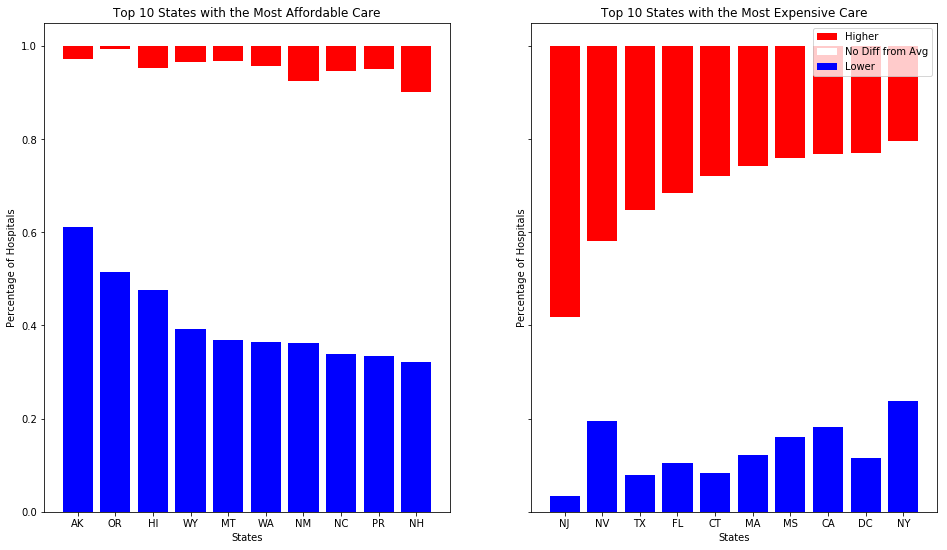

In [375]:
# Variables to plot.
expensive_states = pmt_by_state.sort_values("% Services More Expensive than National Avg", ascending=False).dropna().head(10)
affordable_states = pmt_by_state.sort_values("% Services Less Expensive than National Avg", ascending=False).dropna().head(10)

# Create one plot. 
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

fig.set_size_inches(16, 9)

####--
# Affordable states
ax1.set_title('Top 10 States with the Most Affordable Care')
ax1.set_ylabel('Percentage of Hospitals')
ax1.set_xlabel('States')


a3 = ax1.bar(x=affordable_states.index.values, \
             height=affordable_states["% Services Less Expensive than National Avg"], \
             color='blue', width=0.8, align="center")

a2 = ax1.bar(x=affordable_states.index.values, \
             height=affordable_states["% Services No Different from National Avg"], \
             bottom=affordable_states["% Services Less Expensive than National Avg"], \
             color='white', width=0.8, align="center")

a1 = ax1.bar(x=affordable_states.index.values, \
             height=affordable_states["% Services More Expensive than National Avg"], \
             bottom=affordable_states["% Services Less Expensive than National Avg"]+affordable_states["% Services No Different from National Avg"], \
             color='red', width=0.8, align="center")

plt.legend((a1[0], a2[0], a3[0]), ('Higher', 'No Diff from Avg', "Lower"))


# Expensive states
ax2.set_title('Top 10 States with the Most Expensive Care')
ax2.set_ylabel('Percentage of Hospitals')
ax2.set_xlabel('States')

e3 = ax2.bar(x=expensive_states.index.values, \
             height=expensive_states["% Services Less Expensive than National Avg"], \
             color='blue', width=0.8, align="center")

e2 = ax2.bar(x=expensive_states.index.values, \
             height=expensive_states["% Services No Different from National Avg"], \
             bottom=expensive_states["% Services Less Expensive than National Avg"], \
             color='white', width=0.8, align="center")

e1 = ax2.bar(x=expensive_states.index.values, \
             height=expensive_states["% Services More Expensive than National Avg"], \
             bottom=expensive_states["% Services Less Expensive than National Avg"]+expensive_states["% Services No Different from National Avg"], \
             color='red', width=0.8, align="center")


plt.legend((e1[0], e2[0], e3[0]), ('Higher', 'No Diff from Avg', "Lower"))

#fig.savefig('top_states_most_least_expensive_care.png', dpi=100)

# Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) Patient Survey

According to the data dictionary from the CMS, "the HCAHPS Patient Survey, also known as the CAHPS® Hospital Survey or Hospital CAHPS, is a survey instrument and data collection methodology for measuring patients’ perceptions of their hospital experience. The survey is administered to a random sample of adult inpatients after discharge. The HCAHPS survey contains patient perspectives on care and patient rating items that encompass key topics: **communication with hospital staff, responsiveness of hospital staff, pain management, communication about medicines, discharge information, cleanliness of hospital environment, quietness of hospital environment, and transition of care.**


## Data Interpretation

### HCAHPS star ratings
Here is an excerpt from the medicare website (https://www.medicare.gov/hospitalcompare/Data/HCAHPS-Star-Ratings.html)
> Using data from the 10 HCAHPS measures publicly reported on Hospital Compare, CMS created 10 HCAHPS star ratings. Star ratings for composite topics (listed below) combine multiple questions from the HCAHPS Survey. For instance, the nurse communication star rating combines data from 3 questions from the HCAHPS Survey. Star ratings for individual and global topics represent individual questions on the HCAHPS Survey.
>
> **Composite topics**
> 
> * Nurse communication (questions 1, 2, 3)
> * Doctor communication (questions 5, 6, 7)
> * Responsiveness of hospital staff (questions 4, 11)
> * Communication about medicines (questions 16, 17)
> * Discharge information (questions 19, 20)
> * Care transition (questions 23, 24, 25)
>
> **Individual topics**
>
> * Cleanliness of hospital environment (question 8)
> * Quietness of hospital environment (question 9)
>
> **Global topics**
> * Hospital rating (question 21)
> * Willingness to recommend hospital (question 22)


## Data Analysis

HCAHPS - HOSPITAL.CSV contains: Hospital-level results for the Hospital Consumer Assessment of Healthcare Providers and Systems

In [16]:
hcahps = pd.read_csv('/Users/haeranglee/Documents/MIDS/Hospital_Revised_Flatfiles_recent/HCAHPS - HOSPITAL.CSV')

hcahps.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,NaN,72,NaN,Not Applicable,526,NaN,21,NaN,10/01/2017,09/30/2018
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,NaN,9,NaN,Not Applicable,526,NaN,21,NaN,10/01/2017,09/30/2018
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,NaN,19,NaN,Not Applicable,526,NaN,21,NaN,10/01/2017,09/30/2018
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,NaN,Not Applicable,NaN,87,526,NaN,21,NaN,10/01/2017,09/30/2018
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,NaN,Not Applicable,NaN,Not Applicable,526,NaN,21,NaN,10/01/2017,09/30/2018


In [17]:
hcahps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455235 entries, 0 to 455234
Data columns (total 22 columns):
Provider ID                              455235 non-null object
Hospital Name                            455235 non-null object
Address                                  455235 non-null object
City                                     455235 non-null object
State                                    455235 non-null object
ZIP Code                                 455235 non-null int64
County Name                              455235 non-null object
Phone Number                             455235 non-null int64
HCAHPS Measure ID                        455235 non-null object
HCAHPS Question                          455235 non-null object
HCAHPS Answer Description                455235 non-null object
Patient Survey Star Rating               455235 non-null object
Patient Survey Star Rating Footnote      15103 non-null object
HCAHPS Answer Percent                    455235 non-null obj

In [18]:
hcahps[["HCAHPS Measure ID", 'HCAHPS Question', 'Patient Survey Star Rating', 'HCAHPS Answer Percent']].head()

,HCAHPS Measure ID,HCAHPS Question,Patient Survey Star Rating,HCAHPS Answer Percent
0,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",Not Applicable,72
1,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",Not Applicable,9
2,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",Not Applicable,19
3,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,Not Applicable,Not Applicable
4,H_COMP_1_STAR_RATING,Nurse communication - star rating,2,Not Applicable


So there are all these measures and it's easy to get caught up in the weeds, trying to analyze patient surveys. Thankfully, there is the summary star rating.

https://www.medicare.gov/hospitalcompare/Data/HCAHPS-Star-Ratings.html

> In addition to star ratings for the 10 HCAHPS measures, CMS is introducing the HCAHPS summary star rating, which is the average of the star ratings of the 10 topic-specific HCAHPS measures. The HCAHPS summary star rating combines information about different aspects of patient experience of care to make it easier for you to compare hospitals. The HCAHPS summary star rating is constructed from the following components:
> 
> The 6 star ratings from each of the 6 HCAHPS composite measures.
> 
> * Nurse communication, doctor communication, responsiveness of hospital staff, communication about medicines, discharge information, and care transition.
> 
> A single star rating for the HCAHPS individual topics.
> * The average of the star ratings assigned to cleanliness of hospital environment and quietness of hospital environment.
> 
> A single star rating for the HCAHPS global topics.
> * The average of the star ratings assigned to hospital rating and willingness to recommend the hospital.
> 


In [19]:
# Let's just look at the star ratings. 
hcahps[hcahps["HCAHPS Measure ID"].str.contains("STAR")]["HCAHPS Measure ID"].unique()

array(['H_COMP_1_STAR_RATING', 'H_COMP_2_STAR_RATING',
       'H_COMP_3_STAR_RATING', 'H_COMP_5_STAR_RATING',
       'H_COMP_6_STAR_RATING', 'H_COMP_7_STAR_RATING',
       'H_CLEAN_STAR_RATING', 'H_QUIET_STAR_RATING',
       'H_HSP_RATING_STAR_RATING', 'H_RECMND_STAR_RATING',
       'H_STAR_RATING'], dtype=object)

According to the data dictionary, H-STAR-RATING is the Summary star rating. So we'll use this to analyze the data further.


In [20]:
hcahps_hstar = hcahps[hcahps["HCAHPS Measure ID"] == "H_STAR_RATING"]

In [176]:
#hcahps_hstar[~(hcahps_hstar["Patient Survey Star Rating"]=="Not Available")]
hcahps_hstar["Patient Survey Star Rating"].unique()

array(['2', '3', 'Not Available', '4', '5', '1'], dtype=object)

In [180]:
# Let's get rid of "Not Available"
hcahps_hstar = hcahps_hstar[~(hcahps_hstar["Patient Survey Star Rating"]=="Not Available")]

hcahps_hstar.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
92,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,...,NaN,Not Applicable,NaN,Not Applicable,526,NaN,21,NaN,10/01/2017,09/30/2018
185,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,H_STAR_RATING,Summary star rating,...,NaN,Not Applicable,NaN,Not Applicable,1153,NaN,35,NaN,10/01/2017,09/30/2018
278,010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,2567688400,H_STAR_RATING,Summary star rating,...,NaN,Not Applicable,NaN,Not Applicable,619,NaN,23,NaN,10/01/2017,09/30/2018
371,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,H_STAR_RATING,Summary star rating,...,NaN,Not Applicable,NaN,Not Applicable,166,NaN,25,NaN,10/01/2017,09/30/2018
557,010011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,2058383122,H_STAR_RATING,Summary star rating,...,NaN,Not Applicable,NaN,Not Applicable,2149,NaN,33,NaN,10/01/2017,09/30/2018


In [182]:
hcahps_hstar["Patient Survey Star Rating"].astype(int).describe()


count    3522.000000
mean        3.221749
std         0.865544
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Patient Survey Star Rating, dtype: float64

In [196]:
# Convert to integer
hcahps_hstar["Patient Survey Star Rating"] = hcahps_hstar["Patient Survey Star Rating"].astype(int)

In [197]:
hcahps_hstar["Patient Survey Star Rating"].unique()


array([2, 3, 4, 5, 1])

In [198]:
hstar_hist = hcahps_hstar["Patient Survey Star Rating"]

The summary star rating goes from 1 to 5, with a mean of 3.22 and median of 3. 

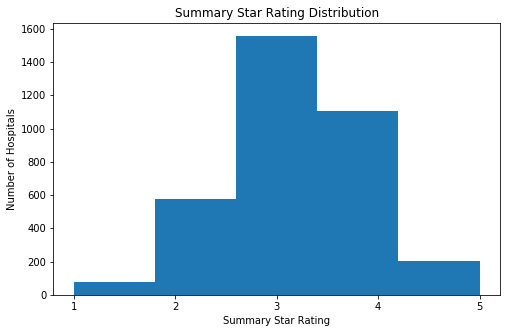

In [199]:
# Create one plot. 
fig, ax3 = plt.subplots(1, 1)

fig.set_size_inches(8, 5)

# Expensive states
ax3.set_title('Summary Star Rating Distribution')

ax3.set_xlabel('Summary Star Rating')
ax3.set_ylabel('Number of Hospitals')

hstar_hist.hist( histtype='bar', bins=5)
ax3.grid(False)

ax3.set_xticks([1, 2, 3, 4, 5])


Now that we know the distribution of star ratings, let's put in a flag for whether the hospital has a summary star rating that is lower than average, higher than average, or average. 

In [203]:
bins = [0, 2, 3, 5]
group_names = ["Below Average", "No Different from Average", "Better than Average"]

hcahps_hstar["Star Status"] = pd.cut(hcahps_hstar["Patient Survey Star Rating"], bins, labels=group_names)


In [209]:
hcahps_hstar[["Patient Survey Star Rating", "Star Status"]].head()

,Patient Survey Star Rating,Star Status
92,2,Below Average
185,3,No Different from Average
278,2,Below Average
371,3,No Different from Average
557,3,No Different from Average


In [213]:
len(hcahps_hstar) 

3522

In [214]:
len(hcahps_hstar["Provider ID"].unique())

3522

In [215]:
# Okay, confirmed that each star rating represents one hospital. 
# Let's create a new dataframe that  pivots the table.

hcahps_hstar_bystate = \
            hcahps_hstar.groupby(["State", "Star Status"]).\
            average().\
            unstack()

# This shows the number of hospitals per star status
hcahps_hstar_bystate.columns

CategoricalIndex(['Below Average', 'No Different from Average',
                  'Better than Average'],
                 categories=['Below Average', 'No Different from Average', 'Better than Average'], ordered=True, name='Star Status', dtype='category')

In [216]:
hcahps_hstar_bystate.head()

Star Status,Below Average,No Different from Average,Better than Average
State,,,
AK,1.0,6.0,3.0
AL,8.0,36.0,26.0
AR,5.0,27.0,19.0
AZ,19.0,32.0,13.0
CA,126.0,137.0,39.0


In [226]:
# Let's add the number of hospitals 

hcahps_hstar_bystate =\
    pd.merge(pd.DataFrame(hcahps_hstar_bystate.sum(axis=1), columns=["Num Hospitals"]),
             hcahps_hstar_bystate, 
             left_index=True, right_index=True)



In [227]:
hcahps_hstar_bystate.head()

,Num Hospitals,Below Average,No Different from Average,Better than Average
State,,,,
AK,10.0,1.0,6.0,3.0
AL,70.0,8.0,36.0,26.0
AR,51.0,5.0,27.0,19.0
AZ,64.0,19.0,32.0,13.0
CA,302.0,126.0,137.0,39.0


In [230]:
hcahps_hstar_bystate["% Better"] =  hcahps_hstar_bystate["Better than Average"]/hcahps_hstar_bystate["Num Hospitals"]
hcahps_hstar_bystate["% Worse"]  =  hcahps_hstar_bystate["Below Average"]/hcahps_hstar_bystate["Num Hospitals"]
hcahps_hstar_bystate["% Average"] = hcahps_hstar_bystate["No Different from Average"]/hcahps_hstar_bystate["Num Hospitals"]

hcahps_hstar_bystate.head(10)

,Num Hospitals,Below Average,No Different from Average,Better than Average,% Better,% Worse,% Average
State,,,,,,,
AK,10.0,1.0,6.0,3.0,0.300000,0.100000,0.600000
AL,70.0,8.0,36.0,26.0,0.371429,0.114286,0.514286
AR,51.0,5.0,27.0,19.0,0.372549,0.098039,0.529412
AZ,64.0,19.0,32.0,13.0,0.203125,0.296875,0.500000
CA,302.0,126.0,137.0,39.0,0.129139,0.417219,0.453642
CO,54.0,NaN,23.0,31.0,0.574074,NaN,0.425926
CT,28.0,4.0,15.0,9.0,0.321429,0.142857,0.535714
DC,8.0,6.0,2.0,NaN,NaN,0.750000,0.250000
DE,7.0,NaN,6.0,1.0,0.142857,NaN,0.857143


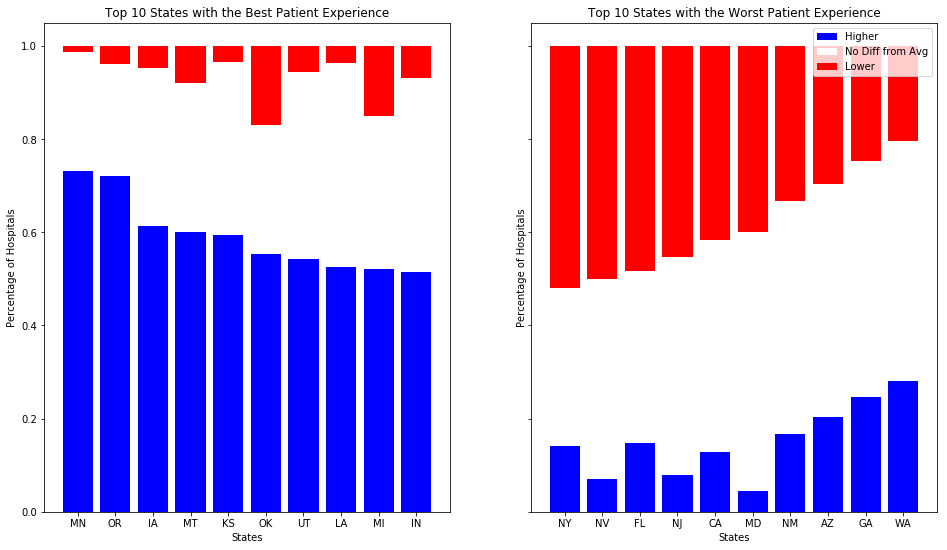

In [371]:
# Variables to plot.
high_star_states = hcahps_hstar_bystate.sort_values("% Better", ascending=False).dropna().head(10)
low_star_states  = hcahps_hstar_bystate.sort_values("% Worse", ascending=False).dropna().head(10)

# Create one plot. 
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

fig.set_size_inches(16, 9)

# Expensive states
ax1.set_title('Top 10 States with the Best Patient Experience')
ax1.set_ylabel('Percentage of Hospitals')
ax1.set_xlabel('States')

e1 = ax1.bar(x=high_star_states.index.values, \
             height=high_star_states["% Better"], \
             color='blue', width=0.8, align="center")

e2 = ax1.bar(x=high_star_states.index.values, \
             height=high_star_states["% Average"], \
             bottom=high_star_states["% Better"], \
             color='white', width=0.8, align="center")

e3 = ax1.bar(x=high_star_states.index.values, \
             height=high_star_states["% Worse"], \
             bottom=high_star_states["% Better"]+high_star_states["% Average"], \
             color='red', width=0.8, align="center")
plt.legend((e1[0], e2[0], e3[0]), ('Higher', 'No Diff from Avg', "Lower"))

# Affordable states
ax2.set_title('Top 10 States with the Worst Patient Experience')
ax2.set_ylabel('Percentage of Hospitals')
ax2.set_xlabel('States')

a1 = ax2.bar(x=low_star_states.index.values, \
             height=low_star_states["% Better"], \
             color='blue', width=0.8, align="center")

a2 = ax2.bar(x=low_star_states.index.values, \
             height=low_star_states["% Average"], \
             bottom=low_star_states["% Better"], \
             color='white', width=0.8, align="center")

a3 = ax2.bar(x=low_star_states.index.values, \
             height=low_star_states["% Worse"], \
             bottom=low_star_states["% Better"]+low_star_states["% Average"], \
             color='red', width=0.8, align="center")

plt.legend((a1[0], a2[0], a3[0]), ('Higher', 'No Diff from Avg', "Lower"))

#fig.savefig('top_states_most_least_expensive_care.png', dpi=100)

Let's see how the patient experience correlates with value of care, as measured by payment.

In [315]:
hcahps_hstar_bystate.head()

,Num Hospitals,Below Average,No Different from Average,Better than Average,% Better,% Worse,% Average
State,,,,,,,
AK,10.0,1.0,6.0,3.0,0.300000,0.100000,0.600000
AL,70.0,8.0,36.0,26.0,0.371429,0.114286,0.514286
AR,51.0,5.0,27.0,19.0,0.372549,0.098039,0.529412
AZ,64.0,19.0,32.0,13.0,0.203125,0.296875,0.500000
CA,302.0,126.0,137.0,39.0,0.129139,0.417219,0.453642


In [316]:
pmt_by_state.head()

,greater,lesser,nodiff,State,Provider ID,num_meas,% Services More Expensive than National Avg,% Services Less Expensive than National Avg,% Services No Different from National Avg
State,,,,,,,,,
NJ,141.0,8.0,93.0,1,64,242,0.582645,0.033058,0.384298
NV,41.0,19.0,38.0,1,30,98,0.418367,0.193878,0.387755
TX,316.0,71.0,509.0,1,313,896,0.352679,0.079241,0.568080
FL,200.0,66.0,368.0,1,173,634,0.315457,0.104101,0.580442
CT,30.0,9.0,68.0,1,29,107,0.280374,0.084112,0.635514


In [328]:
pmt_vs_hstar = pd.merge(hcahps_hstar_bystate, pmt_by_state, left_index=True, right_index=True)\
[["% Better", "% Average", "% Worse", \
  "% Services Less Expensive than National Avg", "% Services No Different from National Avg", "% Services More Expensive than National Avg" ]]


In [329]:
pmt_vs_hstar.head()

,% Better,% Average,% Worse,% Services Less Expensive than National Avg,% Services No Different from National Avg,% Services More Expensive than National Avg
State,,,,,,
AK,0.300000,0.600000,0.100000,0.611111,0.361111,0.027778
AL,0.371429,0.514286,0.114286,0.246753,0.614719,0.138528
AR,0.372549,0.529412,0.098039,0.154255,0.648936,0.196809
AZ,0.203125,0.500000,0.296875,0.269608,0.573529,0.156863
CA,0.129139,0.453642,0.417219,0.182505,0.586393,0.231102


In [331]:
pmt_vs_hstar.columns = \
["higher_star", "avg_star", "lower_star",
"lower_pmt", "avg_pmt", "higher_pmt"]

pmt_vs_hstar.head()

,higher_star,avg_star,lower_star,lower_pmt,avg_pmt,higher_pmt
State,,,,,,
AK,0.300000,0.600000,0.100000,0.611111,0.361111,0.027778
AL,0.371429,0.514286,0.114286,0.246753,0.614719,0.138528
AR,0.372549,0.529412,0.098039,0.154255,0.648936,0.196809
AZ,0.203125,0.500000,0.296875,0.269608,0.573529,0.156863
CA,0.129139,0.453642,0.417219,0.182505,0.586393,0.231102


In [368]:
# Create a scoring column 

pmt_vs_hstar["star_score"] = pmt_vs_hstar["higher_star"] - pmt_vs_hstar["lower_star"]

pmt_vs_hstar["pmt_score"] = pmt_vs_hstar["lower_pmt"] - pmt_vs_hstar["higher_pmt"]

pmt_vs_hstar.head()

,higher_star,avg_star,lower_star,lower_pmt,avg_pmt,higher_pmt,star_score,pmt_score
State,,,,,,,,
AK,0.300000,0.600000,0.100000,0.611111,0.361111,0.027778,0.200000,0.583333
AL,0.371429,0.514286,0.114286,0.246753,0.614719,0.138528,0.257143,0.108225
AR,0.372549,0.529412,0.098039,0.154255,0.648936,0.196809,0.274510,-0.042553
AZ,0.203125,0.500000,0.296875,0.269608,0.573529,0.156863,-0.093750,0.112745
CA,0.129139,0.453642,0.417219,0.182505,0.586393,0.231102,-0.288079,-0.048596


(-0.8, 0.8)

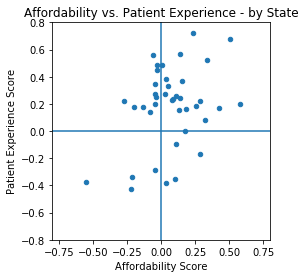

In [395]:
ax1 = pmt_vs_hstar.plot.scatter(x='pmt_score', y='star_score')

ax1.set_title('Affordability vs. Patient Experience - by State')
ax1.set_xlabel('Affordability Score')
ax1.set_ylabel('Patient Experience Score')


ax1.axhline(0)
ax1.axvline(0)
ax1.set_aspect('equal', 'box')
ax1.set_xlim((-0.8, 0.8))
ax1.set_ylim((-0.8, 0.8))




So where are the best hospitals based on affordability and patient experience?

In [377]:
pmt_vs_hstar["exp_n_cost"] = pmt_vs_hstar['pmt_score'] + pmt_vs_hstar['star_score']

In [379]:
pmt_vs_hstar.sort_values("exp_n_cost", ascending=False, inplace=True)
pmt_vs_hstar.head(5)

,higher_star,avg_star,lower_star,lower_pmt,avg_pmt,higher_pmt,star_score,pmt_score,exp_n_cost
State,,,,,,,,,
OR,0.720000,0.240000,0.040000,0.514970,0.479042,0.005988,0.680000,0.508982,1.188982
MN,0.731707,0.256098,0.012195,0.289593,0.651584,0.058824,0.719512,0.230769,0.950281
MT,0.600000,0.320000,0.080000,0.369565,0.597826,0.032609,0.520000,0.336957,0.856957
AK,0.300000,0.600000,0.100000,0.611111,0.361111,0.027778,0.200000,0.583333,0.783333
IA,0.612903,0.338710,0.048387,0.248148,0.644444,0.107407,0.564516,0.140741,0.705257


In [394]:
# And the worst hospitals 
pmt_vs_hstar.dropna().tail(5)

,higher_star,avg_star,lower_star,lower_pmt,avg_pmt,higher_pmt,star_score,pmt_score,exp_n_cost
State,,,,,,,,,
CA,0.129139,0.453642,0.417219,0.182505,0.586393,0.231102,-0.288079,-0.048596,-0.336676
NY,0.141892,0.337838,0.520270,0.237154,0.559289,0.203557,-0.378378,0.033597,-0.344782
FL,0.147059,0.370588,0.482353,0.104101,0.580442,0.315457,-0.335294,-0.211356,-0.546651
NV,0.071429,0.428571,0.500000,0.193878,0.387755,0.418367,-0.428571,-0.224490,-0.653061
NJ,0.078125,0.468750,0.453125,0.033058,0.384298,0.582645,-0.375000,-0.549587,-0.924587
